###  we need to import the SparkSession class from the pyspark.sql module, which is used for interacting with structured data using Spark.

### then we  have created a SparkSession object named "my_app" using the builder() method of the SparkSession class, which allows us to configure the session with various options like app name, master URL, etc. 



In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("my_app").getOrCreate()

23/03/30 00:17:01 WARN Utils: Your hostname, hfz-IdeaPad-5-Pro-16ACH6 resolves to a loopback address: 127.0.1.1; using 192.168.1.7 instead (on interface wlo1)
23/03/30 00:17:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/30 00:17:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.csv("Train_Dataset.csv", header=True, inferSchema=True)

In [3]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Client_Income: string (nullable = true)
 |-- Car_Owned: integer (nullable = true)
 |-- Bike_Owned: integer (nullable = true)
 |-- Active_Loan: integer (nullable = true)
 |-- House_Own: integer (nullable = true)
 |-- Child_Count: string (nullable = true)
 |-- Credit_Amount: string (nullable = true)
 |-- Loan_Annuity: string (nullable = true)
 |-- Accompany_Client: string (nullable = true)
 |-- Client_Income_Type: string (nullable = true)
 |-- Client_Education: string (nullable = true)
 |-- Client_Marital_Status: string (nullable = true)
 |-- Client_Gender: string (nullable = true)
 |-- Loan_Contract_Type: string (nullable = true)
 |-- Client_Housing_Type: string (nullable = true)
 |-- Population_Region_Relative: string (nullable = true)
 |-- Age_Days: string (nullable = true)
 |-- Employed_Days: string (nullable = true)
 |-- Registration_Days: string (nullable = true)
 |-- ID_Days: string (nullable = true)
 |-- Own_House_Age: integer (nullabl

## A histogram is a way to represent the distribution of a numeric variable by dividing it into intervals or bins, and plotting the frequency of observations falling in each bin.

## In the context of Credit Amount and Loan Annuity, a histogram can show the frequency of loan amounts or annuity payments falling within certain ranges.

In [12]:

from pyspark.sql.functions import col, count

df = df.withColumn("Credit_Amount", col("Credit_Amount").cast("double"))
df = df.withColumn("Loan_Annuity", col("Loan_Annuity").cast("double"))


In [13]:
import pandas as pd

hist_data = df.select("Credit_Amount", "Loan_Annuity").toPandas()


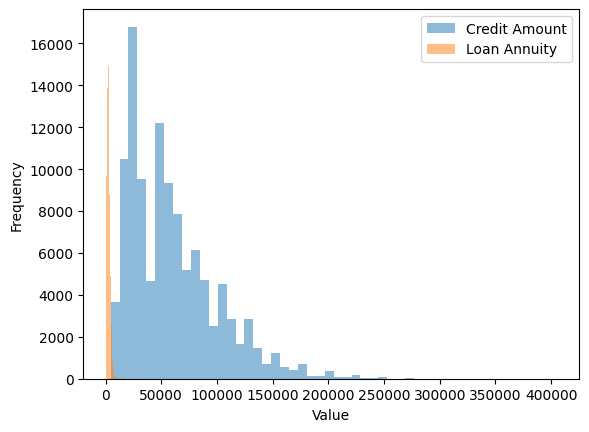

In [14]:


import matplotlib.pyplot as plt

plt.hist(hist_data["Credit_Amount"], bins=50, alpha=0.5, label="Credit Amount")
plt.hist(hist_data["Loan_Annuity"], bins=50, alpha=0.5, label="Loan Annuity")
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


## A bar chart is a chart that presents categorical data with rectangular bars. The height or length of each bar is proportional to the values they represent. Bar charts are useful for comparing the frequency, count, or proportion of different categories.

## In this scenario, a bar chart of loan contract types can help us identify which contract types are the most popular in the dataset. This information can be used to inform business decisions such as which loan products to market more heavily or which contract types to offer more or less frequently.

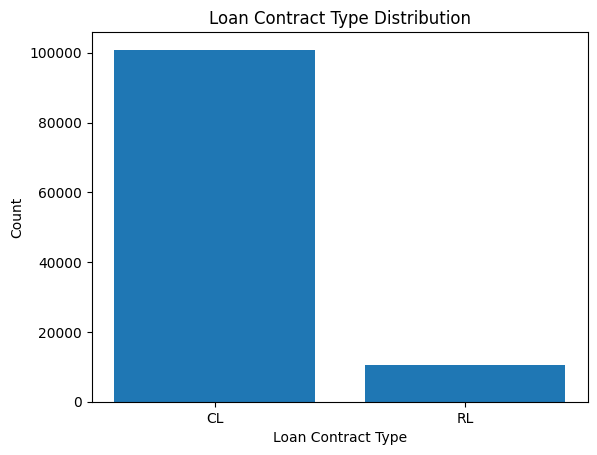

In [16]:


df = df.filter(col("Loan_Contract_Type").isNotNull())
contract_counts = df.groupBy("Loan_Contract_Type").agg(count("*").alias("count"))

contract_counts_pd = contract_counts.toPandas()

plt.bar(contract_counts_pd["Loan_Contract_Type"], contract_counts_pd["count"])
plt.xlabel("Loan Contract Type")
plt.ylabel("Count")
plt.title("Loan Contract Type Distribution")
plt.show()

## A stacked bar chart is a type of bar chart where the different categories of data are stacked on top of each other. 

## A stacked bar chart is helpful in this scenario because it allows us to visualize the distribution of defaults by Loan Contract Type in a clear and concise manner.

## Each Loan Contract Type is represented by a different colored bar, and within each bar, the sections represent the proportion of defaults and non-defaults. This allows us to see both the total number of defaults for each Loan Contract Type as well as the relative proportion of defaults within each Loan Contract Type. 

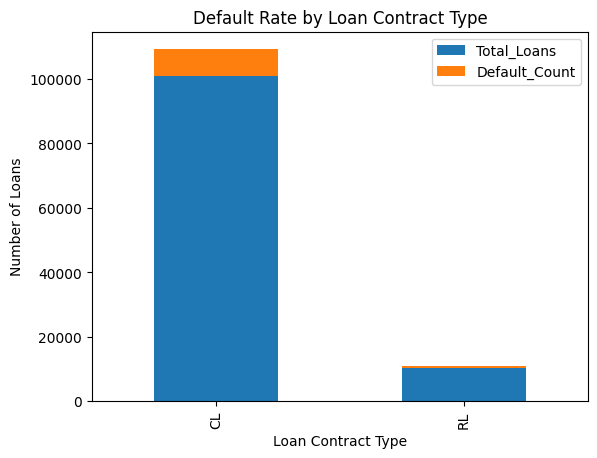

In [17]:

contract_type_default_count = df.groupBy('Loan_Contract_Type').agg(
    F.count('Default').alias('Total_Loans'),
    F.sum('Default').alias('Default_Count')
)

contract_type_default_count = contract_type_default_count.withColumn(
    'Default_Rate', F.col('Default_Count') / F.col('Total_Loans')
)

pd_df = contract_type_default_count.toPandas()
pd_df.plot(x='Loan_Contract_Type', y=['Total_Loans', 'Default_Count'], kind='bar', stacked=True)

plt.title('Default Rate by Loan Contract Type')
plt.xlabel('Loan Contract Type')
plt.ylabel('Number of Loans')
plt.show()


## A pie chart is a circular graph that is divided into slices to represent data as proportions of a whole. Each slice of the pie represents a category or data point, and the size of each slice represents the proportion or percentage of that category or data point in the total data set.

## A pie chart is helpful in this scenario because it provides a quick and easy-to-understand visualization of the gender distribution in the dataset. It allows us to see the proportion of male and female clients at a glance and compare them easily. 

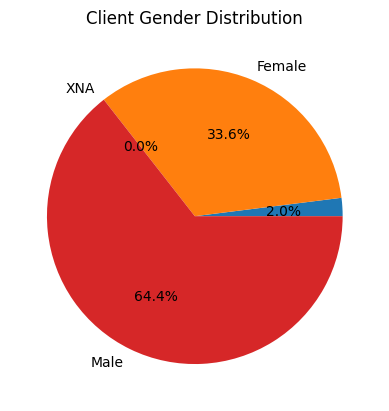

In [24]:

gender_df = df.select('Client_Gender')

gender_counts = gender_df.groupBy('Client_Gender').count().collect()

labels = [row[0] for row in gender_counts]
counts = [row[1] for row in gender_counts]

plt.pie(counts, labels=labels, autopct='%1.1f%%')

plt.title('Client Gender Distribution')

plt.show()
